In [112]:
import numpy as np
import pandas as pd
from pandas.compat import StringIO
df = pd.read_table("http://users.stat.ufl.edu/~winner/data/airq402.dat",sep="\s+",skiprows=1,usecols=[0,1,2,3,4,5,6,7,8,9,10],
                 names=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share','price'])
df

/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


In [113]:
capDf = pd.DataFrame()
for col in df.columns:
    if(df[col].dtype == object):
        capDf[col] = df[col]
        continue
    percentiles = df[col].quantile([0.25,0.75]).values
    Q1 = percentiles[0]
    Q3 = percentiles[1]
    IQR = Q3 - Q1
    minCap = Q1 - (IQR) * 1.5
    maxCap = Q3 + (IQR) * 1.5
    capDf[col] = df[col][(df[col] >= minCap) & (df[col] <= maxCap)]
    
capDf.dropna(inplace=True)
capDf

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


In [114]:
input_vars_X = pd.DataFrame()
target_vars_Y = pd.DataFrame()
input_vars_X = capDf.iloc[ : , [3,4,6,7,9,10]]
target_vars_Y = capDf.iloc[:, [2]]

In [115]:
corrTable = capDf.corr()
corrTable

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,1.000000,0.522229,-0.197354,-0.207560,0.979692,-0.492878,0.840888
Distance,0.522229,1.000000,-0.129901,-0.547777,0.489261,-0.360774,0.539577
Average weekly passengers,-0.197354,-0.129901,1.000000,0.021900,-0.164077,0.076594,-0.209279
market share,-0.207560,-0.547777,0.021900,1.000000,-0.192970,0.280760,-0.314283
Average fare,0.979692,0.489261,-0.164077,-0.192970,1.000000,-0.518783,0.794015
market share.1,-0.492878,-0.360774,0.076594,0.280760,-0.518783,1.000000,-0.260147
price,0.840888,0.539577,-0.209279,-0.314283,0.794015,-0.260147,1.000000


In [116]:
cleanDf = corrTable[corrTable['Average Fare'] >= 0.1]

In [117]:
corrTable - cleanDf

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Average fare,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Average weekly passengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,0.0,0.0,0.0,0.0,0.0,0.0,0.0
market share,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market share.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
columns = ['Average weekly passengers','market share', 'market share.1']
input_vars_X.drop(columns, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [119]:
input_vars_X

,Distance,Average fare,price
0,860,123.09,118.94
1,852,223.98,167.12
2,288,68.86,68.86
3,723,161.36,145.42
4,1204,137.97,127.69
5,2237,148.59,148.59
6,2467,205.06,174.00
7,1073,127.69,127.69
8,1130,132.91,124.78
9,1269,226.79,200.93


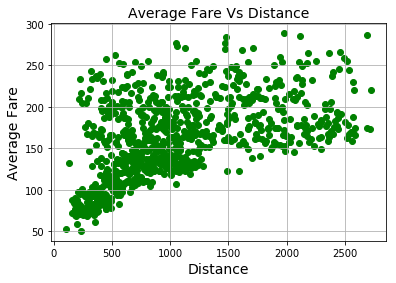

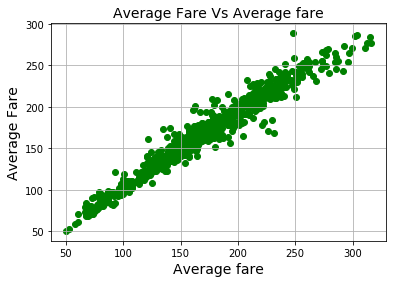

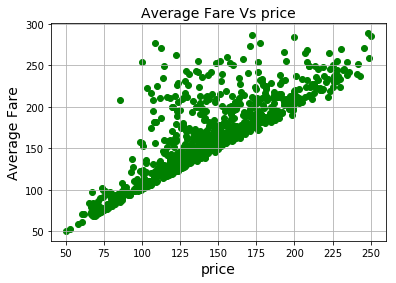

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(capDf['Distance'], capDf['Average Fare'], color='green')
plt.title('Average Fare Vs Distance', fontsize=14)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(capDf['Average fare'], capDf['Average Fare'], color='green')
plt.title('Average Fare Vs Average fare', fontsize=14)
plt.xlabel('Average fare', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(capDf['price'], capDf['Average Fare'], color='green')
plt.title('Average Fare Vs price', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.grid(True)
plt.show()

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_vars_X, target_vars_Y, test_size=0.20, random_state=1)
print("Shape X-Train:", x_train.shape)
print("Shape X-Test:", x_test.shape)
print("Shape Y-Train:", y_train.shape)
print("Shape Y-Test:", y_test.shape)

Shape X-Train: (707, 3)
Shape X-Test: (177, 3)
Shape Y-Train: (707, 1)
Shape Y-Test: (177, 1)


In [122]:
model = LinearRegression()
model.fit(x_train, y_train)
beta1 = model.coef_
print("Coef (b1): ", beta1)
coeffDf = pd.DataFrame(np.array(beta1).tolist(), columns = input_vars_X.columns)
coeffDf

Coef (b1):  [[0.00190941 0.75883985 0.20613721]]


,Distance,Average fare,price
0,0.001909,0.75884,0.206137


In [123]:
beta0 = model.intercept_
print("Intercept (b0): ", beta0)

Intercept (b0):  [5.87088752]


In [124]:
model.score(input_vars_X, target_vars_Y)

0.970921598346028